In [93]:
import pandas as pd
import isodate
from dateutil import parser

from googleapiclient.discovery import build
from IPython.display import JSON

from config.config import YOUTUBE_API_KEY
from api_methods import collect_channel_stats, collect_video_ids, collect_video_details

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [94]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/varfo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/varfo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey=YOUTUBE_API_KEY)

In [3]:
# Channels to analyze
channel_ids = [
    "UCYO_jab_esuFRV4b17AJtAw",
    # Can add more channels
]

In [4]:
channel_stats = collect_channel_stats(youtube, channel_ids)

In [12]:
channel_stats.head()

,channelName,subscribers,views,totalVideos,playlistId
0,3Blue1Brown,5720000,408569095,156,UUYO_jab_esuFRV4b17AJtAw


In [6]:
playlist_id = channel_stats.loc[channel_stats['channelName']== "3Blue1Brown", "playlistId"].iloc[0]

In [7]:
video_ids = collect_video_ids(youtube, playlist_id)

In [91]:
len(video_ids)

157

In [97]:
video_df = collect_video_details(youtube, video_ids)

In [100]:
# Write to csv to experiment on data
video_df.to_csv('video_df.csv', index=False)

In [102]:
video_df = pd.read_csv('video_df.csv')

In [104]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,tjIOqIr80ns,3Blue1Brown,The limit of limiting arguments,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-23T00:00:26Z,526586,29443,NaN,252,PT51S,hd,False
1,W1gW1dHRsOw,3Blue1Brown,For anyone who might not know how links in sho...,YouTube disabled links in descriptions and com...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-21T00:15:02Z,147208,11028,NaN,312,PT1M,hd,False
2,p9i3cYMQtBY,3Blue1Brown,Infinite Lighthouses and π,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-21T00:00:20Z,632078,47320,NaN,285,PT1M,hd,False
3,X4jpqCu-wlA,3Blue1Brown,Can you even imagine 2^256?,Originally written as a supplement to an expla...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-16T00:00:24Z,791360,49783,NaN,468,PT1M,hd,False
4,GOSezO0CHss,3Blue1Brown,Order from chaos,A link to the full video on the Central Limit ...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-15T00:00:13Z,7354500,202417,NaN,1214,PT50S,hd,False


In [107]:
# Check for NULL values
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [108]:
# Check data types
video_df.dtypes

video_id           object
channelTitle       object
title              object
description        object
tags               object
publishedAt        object
viewCount           int64
likeCount           int64
favouriteCount    float64
commentCount        int64
duration           object
definition         object
caption              bool
dtype: object

In [109]:
# Find published day
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [116]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName
0,tjIOqIr80ns,3Blue1Brown,The limit of limiting arguments,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-23 00:00:26+00:00,526586,29443,NaN,252,PT51S,hd,False,Saturday
1,W1gW1dHRsOw,3Blue1Brown,For anyone who might not know how links in sho...,YouTube disabled links in descriptions and com...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-21 00:15:02+00:00,147208,11028,NaN,312,PT1M,hd,False,Thursday
2,p9i3cYMQtBY,3Blue1Brown,Infinite Lighthouses and π,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-21 00:00:20+00:00,632078,47320,NaN,285,PT1M,hd,False,Thursday
3,X4jpqCu-wlA,3Blue1Brown,Can you even imagine 2^256?,Originally written as a supplement to an expla...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-16 00:00:24+00:00,791360,49783,NaN,468,PT1M,hd,False,Saturday
4,GOSezO0CHss,3Blue1Brown,Order from chaos,A link to the full video on the Central Limit ...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-15 00:00:13+00:00,7354500,202417,NaN,1214,PT50S,hd,False,Friday


In [137]:
# convert duration to seconds
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = pd.to_timedelta(video_df['durationSecs'])
video_df['durationSecs'] = video_df['durationSecs'].astype(str).map(lambda x: x[7:])

In [138]:
video_df[['durationSecs', 'duration']] 

,durationSecs,duration
0,00:00:51,PT51S
1,00:01:00,PT1M
2,00:01:00,PT1M
3,00:01:00,PT1M
4,00:00:50,PT50S
...,...,...
152,00:15:08,PT15M8S
153,00:07:27,PT7M27S
154,00:01:49,PT1M49S
155,00:01:04,PT1M4S


In [139]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs
0,tjIOqIr80ns,3Blue1Brown,The limit of limiting arguments,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-23 00:00:26+00:00,526586,29443,NaN,252,PT51S,hd,False,Saturday,00:00:51
1,W1gW1dHRsOw,3Blue1Brown,For anyone who might not know how links in sho...,YouTube disabled links in descriptions and com...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-21 00:15:02+00:00,147208,11028,NaN,312,PT1M,hd,False,Thursday,00:01:00
2,p9i3cYMQtBY,3Blue1Brown,Infinite Lighthouses and π,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-21 00:00:20+00:00,632078,47320,NaN,285,PT1M,hd,False,Thursday,00:01:00
3,X4jpqCu-wlA,3Blue1Brown,Can you even imagine 2^256?,Originally written as a supplement to an expla...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-16 00:00:24+00:00,791360,49783,NaN,468,PT1M,hd,False,Saturday,00:01:00
4,GOSezO0CHss,3Blue1Brown,Order from chaos,A link to the full video on the Central Limit ...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-15 00:00:13+00:00,7354500,202417,NaN,1214,PT50S,hd,False,Friday,00:00:50


In [145]:
plt.rcParams["figure.figsize"] = (12,6)

/tmp/ipykernel_9017/73220587.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


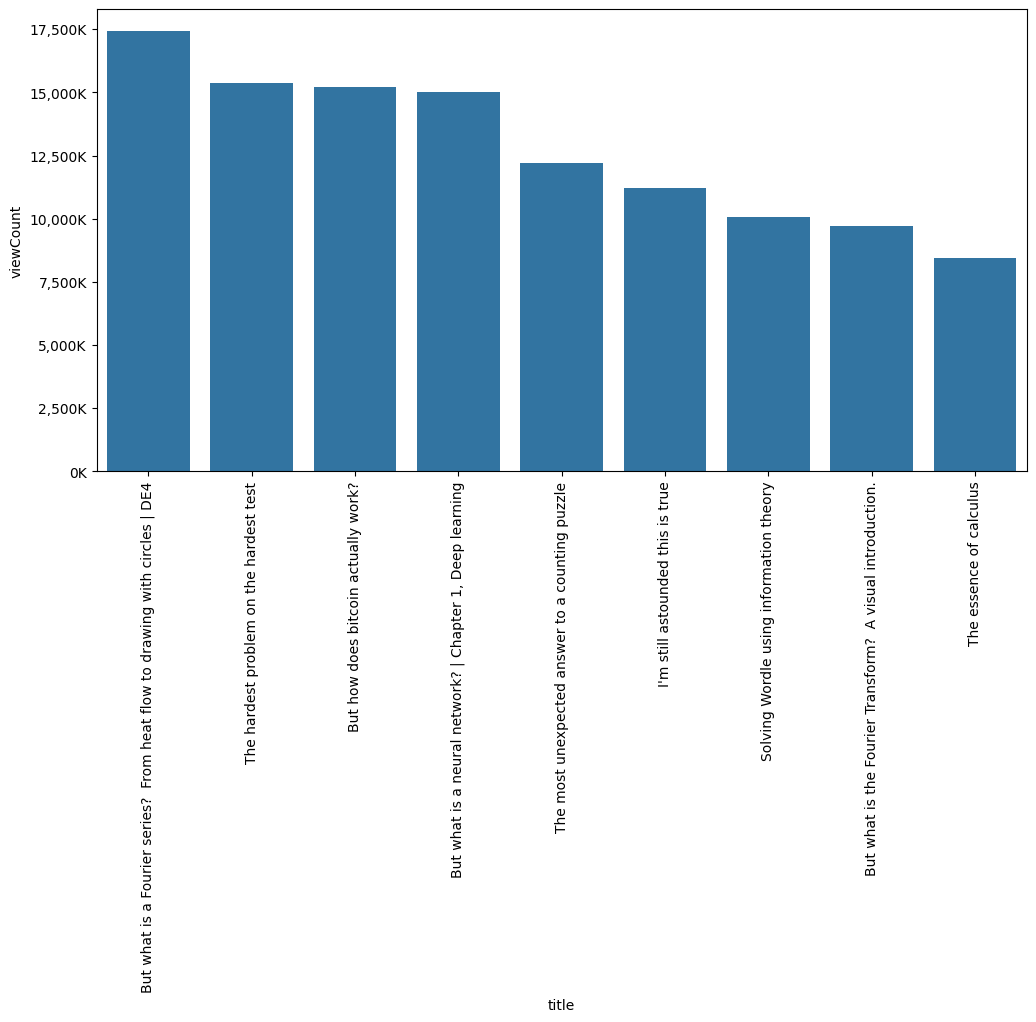

In [146]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

/tmp/ipykernel_9017/171811544.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


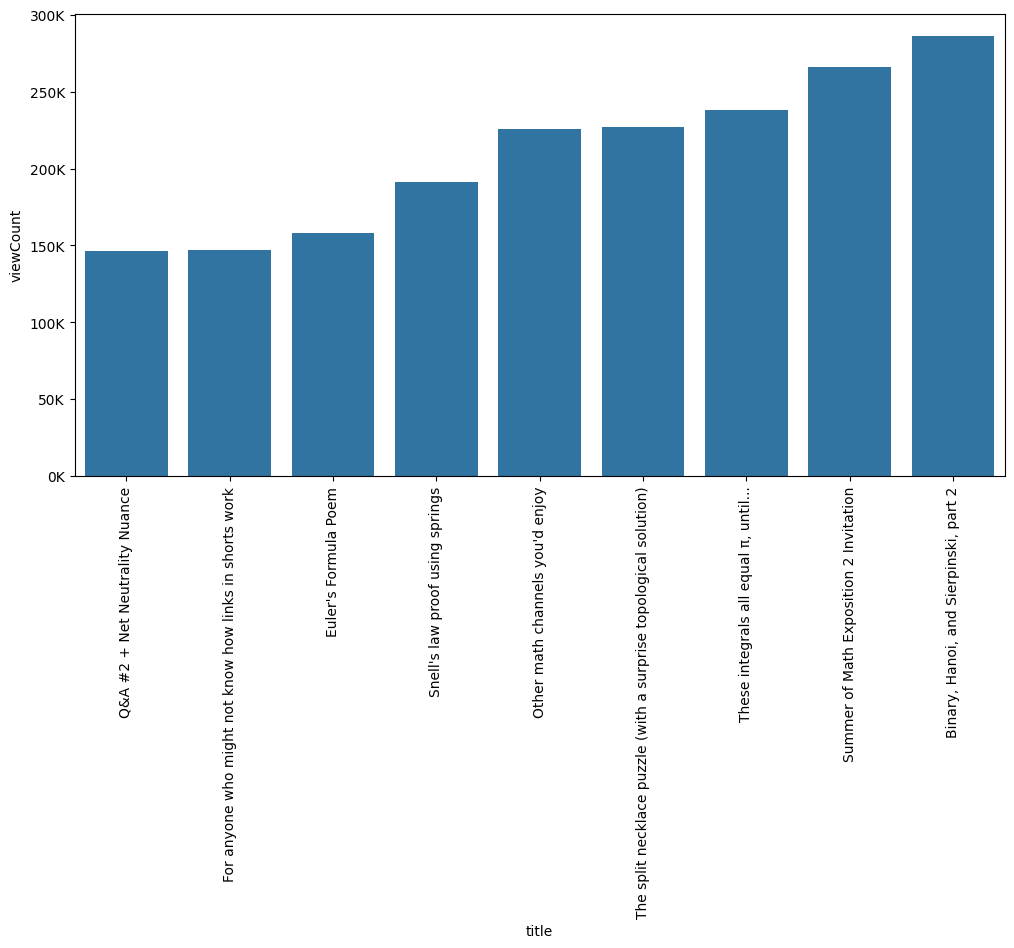

In [147]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

<Axes: ylabel='viewCount'>

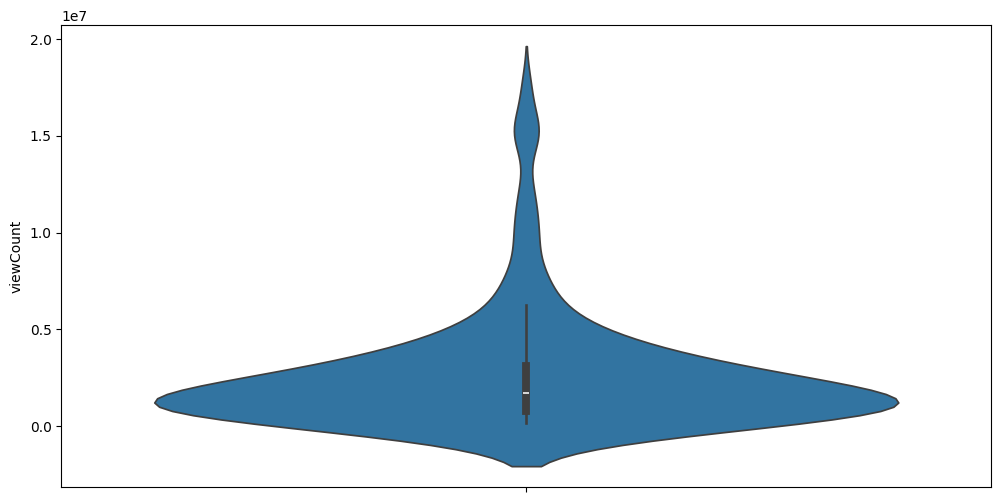

In [148]:
sns.violinplot(video_df['viewCount'])

<Axes: xlabel='likeCount', ylabel='viewCount'>

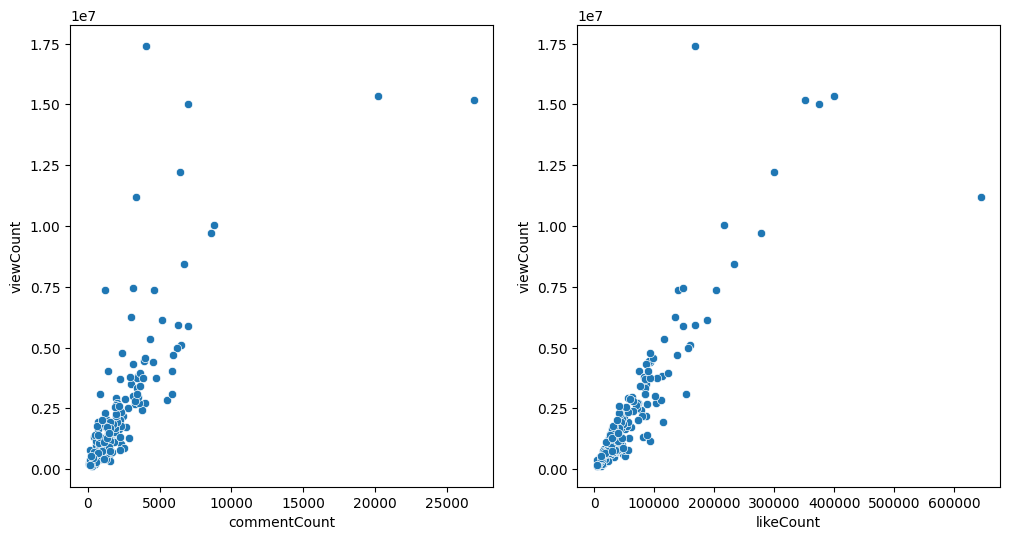

In [149]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

<Axes: xlabel='durationSecs', ylabel='Count'>

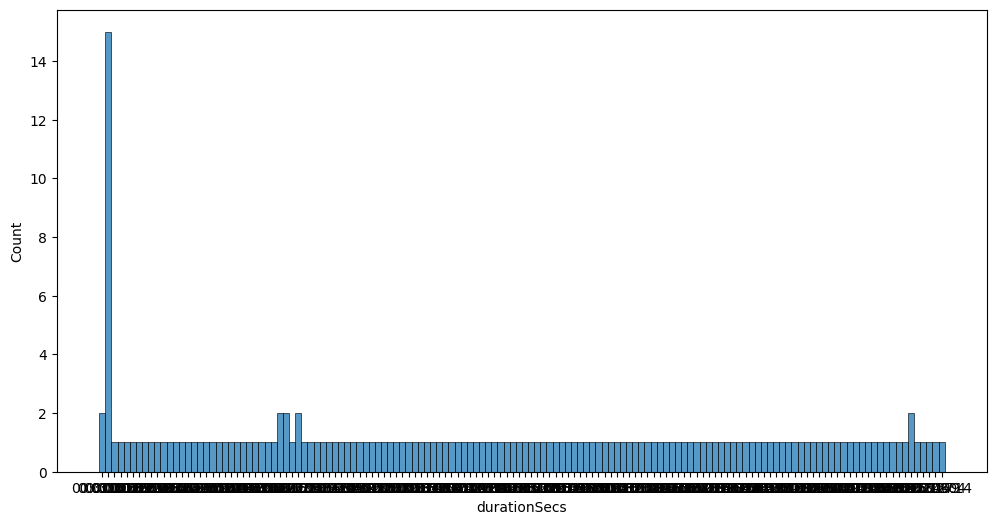

In [152]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

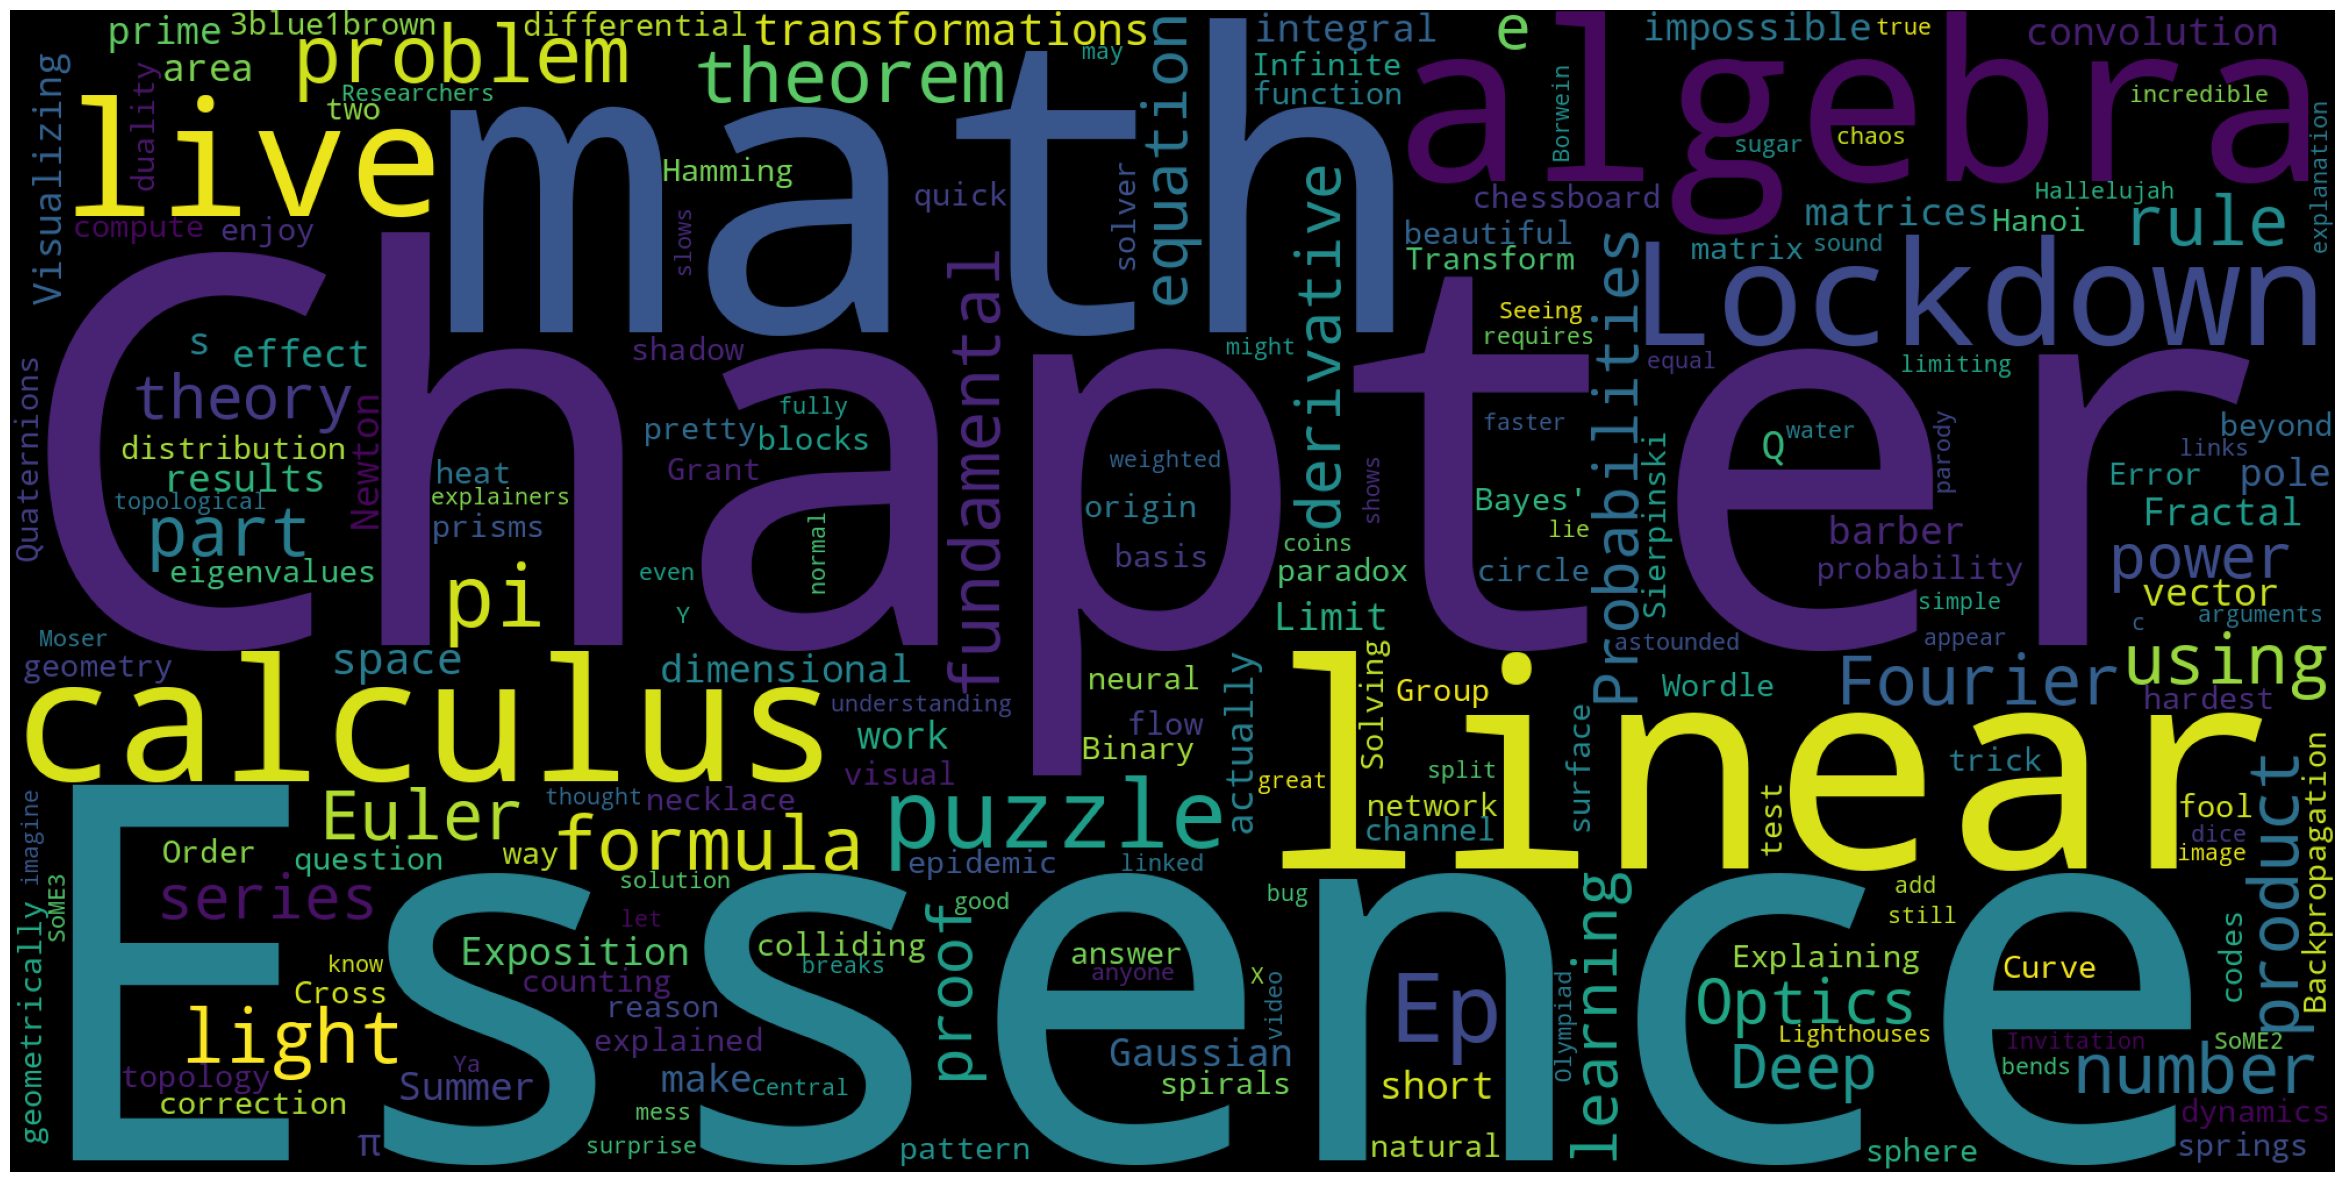

In [153]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [154]:
day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [155]:
day_df = day_df.reindex(weekdays)

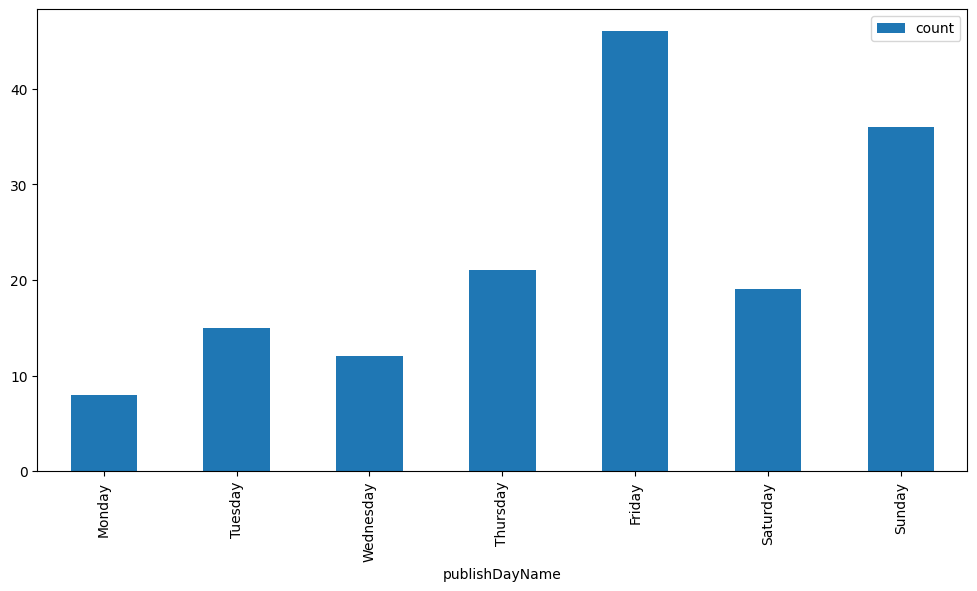

In [156]:
day_df.plot(kind="bar")
plt.show()

In [157]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs,title_no_stopwords
0,tjIOqIr80ns,3Blue1Brown,The limit of limiting arguments,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-23 00:00:26+00:00,526586,29443,NaN,252,PT51S,hd,False,Saturday,00:00:51,"[The, limit, limiting, arguments]"
1,W1gW1dHRsOw,3Blue1Brown,For anyone who might not know how links in sho...,YouTube disabled links in descriptions and com...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-21 00:15:02+00:00,147208,11028,NaN,312,PT1M,hd,False,Thursday,00:01:00,"[For, anyone, might, know, links, shorts, work]"
2,p9i3cYMQtBY,3Blue1Brown,Infinite Lighthouses and π,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-21 00:00:20+00:00,632078,47320,NaN,285,PT1M,hd,False,Thursday,00:01:00,"[Infinite, Lighthouses, π]"
3,X4jpqCu-wlA,3Blue1Brown,Can you even imagine 2^256?,Originally written as a supplement to an expla...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-16 00:00:24+00:00,791360,49783,NaN,468,PT1M,hd,False,Saturday,00:01:00,"[Can, even, imagine, 2^256?]"
4,GOSezO0CHss,3Blue1Brown,Order from chaos,A link to the full video on the Central Limit ...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-15 00:00:13+00:00,7354500,202417,NaN,1214,PT50S,hd,False,Friday,00:00:50,"[Order, chaos]"
